# Pandas II - Multi-Data Frame and Advanced Data Frame Operations
#### Yufeng Huang
#### Associate Professor of Marketing, Simon Business School
#### August 12 and 13, 2024


## This lecture note
6. Combining multiple data frames -- concatenate and merge
7. Aggregation inside data frames -- .agg() and .groupby()
8. Pivot and pivot tables
9. Miscelaneous topics
10. Exercises

## 6. Concatenate and Merge 
We oftentimes do not only work on one data frame. We often work on multiple. Examples:

1. We have one table per year. As we assumulate data, we store them in different files. What happens if we need to plot a time series that involve multiple years of data. We first need to **"concatenate"** these data together to create a data frame with more rows. 

2. We record different things in different tables. In one table, we have students' scores. In another table, we have their basic background information. What if we would like to analyze the relationship between basic background info and class performance? We first need to **"merge"** these tables.

Here we're talking about concatenating data and merging data. 

### 5.1 Concatenate Data Frames

The story is that Amy is a school administrator. She is working on a set of students' background data, which captures students' name, entry year, and test score at entry. 

The data are recorded in such a way that each entry year's student are in one file. Amy has three years' data, from 2019 to 2021. So she has three files. She starts by reading these files. 

In [73]:
# To start, import numpy, pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read 2020-2021 data
background_dat_2020 = pd.read_csv("./data/students_background_2020.csv")
background_dat_2021 = pd.read_csv("./data/students_background_2021.csv")

# Read and show 2019 data
background_dat_2019 = pd.read_csv("./data/students_background_2019.csv")
background_dat_2019.head()

,name,entry_year,test_score
0,Bob Johnson,2019,75
1,Diana Prince,2019,89
2,Hannah Montana,2019,91
3,Julia Roberts,2019,89
4,Lara Croft,2019,90


Amy realizes she will need to first combine these data before she can work on the subsequent step. She would like all data to be in the same data frame. It would make sense to have a data frame with the same column, but with rows that is the sum of all three data frame's number of rows. 

Conceptually, she would like to do:

In [75]:
# conceptual example
dat_1 = pd.DataFrame([
    ["A", 1], 
    ["B", 2]
], columns=["name", "value"])
dat_2 = pd.DataFrame([
    ["C", 3], 
    ["D", 4]
], columns=["name", "value"])

# then Amy would like to have 
dat = pd.DataFrame([
    ["A", 1], 
    ["B", 2],
    ["C", 3], 
    ["D", 4]
], columns=["name", "value"])

Amy can use `pd.concat()` to combine the two data. She realizes that `.concat` actually works similarly as `np.concatenate()` in that (1) we specify the axis **along which** the concatenation takes place. But, different from NumPy, (2) concatentation occurs by aligning and preserving indices.

In Amy's case, she can set `axis=0` to indicate that the concatentation is along rows (extend the number of rows). The column indices are the column names (or `.columns`), which should be automatically aligned. 

Before actually doing the work, she tests out `pd.concat()` using the simple example above.

In [76]:
# Test 0: np.concatenate
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.array([[9, 10], [11, 12]])
np.concatenate((a, b, c), axis=0)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [77]:
# Test 1: concatenate dat_1 and dat_2
pd.concat((dat_1, dat_2), axis=0)

,name,value
0,A,1
1,B,2
0,C,3
1,D,4


Happy! Let's then work on actually concatenating the data

In [78]:
# First create the tuple of data frames. Here we only have three, so we can also manually type them:
pd.concat((background_dat_2019, background_dat_2020, background_dat_2021), axis=0)

,name,entry_year,test_score,test_scroe
0,Bob Johnson,2019,75.0,NaN
1,Diana Prince,2019,89.0,NaN
2,Hannah Montana,2019,91.0,NaN
3,Julia Roberts,2019,89.0,NaN
4,Lara Croft,2019,90.0,NaN
5,Nathan Drake,2019,80.0,NaN
6,Peter Parker,2019,88.0,NaN
7,Rachel Green,2019,92.0,NaN
8,Uma Thurman,2019,83.0,NaN
9,Yvonne Strahovski,2019,91.0,NaN


#### What's wrong? 
It seems that test_score is mis-spelled as "test_scroe"!

Index preservation will lead to `pd.concat` recognizing "test_scroe" as a separate column from "test_score."

You might laugh at this dumb mistake. But trust me, variables are often named differently for different year of data.

What to do? Need to change column name. Here we use `pd.DataFrame.rename(columns={"old_name": "new_name"}, inplace=True)`.

In [79]:
# Change column name first
background_dat_2021.rename(columns={"test_scroe": "test_score"}, inplace=True)

Note: rename is not by default inplace (replace the existing data). Either say inplace=True, or assign the result as `background_dat_2021`.

In [80]:
# Then concatenate everything as background_dat
background_dat = pd.concat((background_dat_2019, background_dat_2020, background_dat_2021), axis=0)
background_dat.head()

,name,entry_year,test_score
0,Bob Johnson,2019,75
1,Diana Prince,2019,89
2,Hannah Montana,2019,91
3,Julia Roberts,2019,89
4,Lara Croft,2019,90


#### Are we happy now?

Hmmm, perhaps we missed something else?

In [81]:
# Missed something else? Shall we print the whole data and see?
background_dat  # discovered index is duplicated and make no sense

,name,entry_year,test_score
0,Bob Johnson,2019,75
1,Diana Prince,2019,89
2,Hannah Montana,2019,91
3,Julia Roberts,2019,89
4,Lara Croft,2019,90
5,Nathan Drake,2019,80
6,Peter Parker,2019,88
7,Rachel Green,2019,92
8,Uma Thurman,2019,83
9,Yvonne Strahovski,2019,91


In [82]:
# What to do? reset index
background_dat.reset_index(drop=True, inplace=True)

#### Comment
Concat usually will result in duplicated explicit row indices if the previous row indices are not meticulously assigned. So we'll need to reset indices using `pd.DataFrame.reset_index()`. Argument `drop=True` will prevent generating a new index column. Argument `inplace=True` will replace the existing `background_dat`. 

### 5.2 Merge Data Frames

Back to Amy's story with the grades.

Now, Amy would like to combine the students' background data with their grades. She gets three grade lists: grades for GBA436, GBA464, and MKT440. Not all students have taken all exams. Amy first reads the three datasets.

In [83]:
gba436 = pd.read_csv("./data/students_gba436.csv")
gba464 = pd.read_csv("./data/students_gba464.csv")
mkt440 = pd.read_csv("./data/students_mkt440.csv")
mkt440.head()

,name,exam_year,exam_score
0,Alice Smith,2021,94
1,Charlie Brown,2022,84
2,Fiona Gallagher,2021,75
3,Ian McKellen,2023,80
4,Julia Roberts,2022,84


How to combine these data in the form where `exam_year` and `exam_score` are **separate columns** for different courses?

Amy first thought about concatenating them. Afterall, we learned from NumPy that concatenating with axis=1 will combine arrays "alongside" each other. She tries `pd.concat((gba436, gba464, mkt440), axis=1)` but finds:

In [84]:
pd.concat((gba436, gba464, mkt440), axis=1)

,name,exam_year,exam_score,name,exam_year,exam_score,name,exam_year,exam_score
0,Alice Smith,2021.0,88.0,Alice Smith,2021,100,Alice Smith,2021.0,94.0
1,Charlie Brown,2022.0,96.0,Bob Johnson,2023,88,Charlie Brown,2022.0,84.0
2,Diana Prince,2023.0,88.0,Diana Prince,2023,90,Fiona Gallagher,2021.0,75.0
3,Fiona Gallagher,2021.0,78.0,Ethan Hunt,2021,97,Ian McKellen,2023.0,80.0
4,George Clooney,2022.0,82.0,George Clooney,2022,80,Julia Roberts,2022.0,84.0
5,Hannah Montana,2023.0,89.0,Ian McKellen,2023,98,Lara Croft,2023.0,100.0
6,Lara Croft,2023.0,79.0,Julia Roberts,2022,91,Olivia Wilde,2023.0,87.0
7,Megan Fox,2021.0,100.0,Kevin Bacon,2023,100,Peter Parker,2022.0,91.0
8,Nathan Drake,2023.0,85.0,Lara Croft,2023,92,Rachel Green,2021.0,100.0
9,Peter Parker,2022.0,93.0,Megan Fox,2021,97,Sam Winchester,2023.0,76.0


#### Doesn't make a lot of sense! But why?
- In `pd.concat()`, we concatenate by index. So when we concatenate by expanding rows (i.e., data frames on top of one another), we naturally align column names. When we concatenate by expanding columns (i.e., data frames on the side of one another), we naturally align row indices. 
- But in many data frames, rows are not pinned down by indices (although explicit indices still exist). So when we concatenate, we align rows by these numeric, explicit indices that do not make much sense. 
- What to do? First, we need to talk about keys.

#### Determine the Keys of a Data Frame
Keys are the set of variables that uniquely pin down each observation. In `gba436`, the variable `name` uniquely pins down each observation -- that is, each unique name must correspond to one observation. This is because each person only takes the exam once. In `background_dat`, unique values of `name` also pins down each observation. 

Not every data frame has one key variable. In some data frames, the combination of multiple variables uniquely pin down each observation. For example, if some students were to take exams multiple times, up to one time per year, then the student name and exam year combined would be a *composite key*.

Not every data frame has key variables. In some data frames, no variable can uniquely pin down each row. In this case, we would hope that the row index could pick up this task. But sometimes, the data frame is not well constructed in that we really cannot use variables to pin down the observation. This is a problematic case that would lead to poorly managed data bases.

Example 1: one key variable. In this example, `name` is the key variable for `gba464`. We have numerous methods to check if `name` is unique.

In [85]:
# .is_unique checks if *all* elements are unique
gba464["name"].is_unique

True

In [86]:
# .unique() gives all unique elements, and then we can check length
len(gba464) == len(gba464["name"].unique())

True

Example 2: composite key consisting of multiple key variables. Let's read another dataset: weekly price data.

In [87]:
# Read weekly price data
price_data = pd.read_csv("./data/retail_prices.csv")
price_data.head(20)

,product,week,price
0,Product_A,2024-01-01,2.75
1,Product_A,2024-01-08,2.75
2,Product_A,2024-01-15,2.75
3,Product_A,2024-01-22,2.75
4,Product_A,2024-01-29,2.75
5,Product_A,2024-02-05,3.03
6,Product_A,2024-02-12,3.03
7,Product_A,2024-02-19,3.03
8,Product_A,2024-02-26,3.03
9,Product_A,2024-03-04,3.03


What are the key variables? Given that the data are called "price_data" and only contains `product`, `week`, and `price`, we have a **guess** that perhaps the composite key is product-week. Let's try to verify this. 

Note that we cannot simply verify whether each column contains all unique values. We'll have to use .duplicated() to check whether part of the data are duplicated.

Question: what are we doing below?

In [88]:
# Verify that product/week are the composite key 
#   What are doing here? We're counting whether there are duplicated combinations of product and week.
price_data[["product", "week"]].duplicated().sum()

0

This dataset is actually from a pretty non-trivial data exercise. We'll return to it later today.

Example 3: no keys. If a data frame truly has no keys, this data frame often does not have well-defined observations for it to be useful. See examples.

Example 3-1: No keys at all. Whose grades are these? We don't know. 

In [89]:
# No keys: example 3-1
student_grade_data = pd.DataFrame({"grade":[92, 88, 95, 91, 99]})
student_grade_data

,grade
0,92
1,88
2,95
3,91
4,99


Example 3-2: Duplicated names, so names are not keys. Did Alice Smith get 92 and 88 in two separate exams? Are these different courses or the same course in different years? We don't know. The information is incomplete.

In [90]:
# Duplicated names, no keys.
student_grade_data = pd.DataFrame({"name": ["Alice Smith", "Alice Smith", "Charlie Brown", "Charlie Brown", "Ethan Hunt"], 
                                   "grade": [92, 88, 95, 91, 99]})
student_grade_data

,name,grade
0,Alice Smith,92
1,Alice Smith,88
2,Charlie Brown,95
3,Charlie Brown,91
4,Ethan Hunt,99


Example 3-3: Duplicated names but we also have years, forming composite key name-year. This is good. 

In [91]:
# Composite key. This is good. 
student_grade_data = pd.DataFrame({"name": ["Alice Smith", "Alice Smith", "Charlie Brown", "Charlie Brown", "Ethan Hunt"], 
                                   "year": [2021, 2020, 2021, 2020, 2021],
                                   "grade": [92, 88, 95, 91, 99]})
student_grade_data

,name,year,grade
0,Alice Smith,2021,92
1,Alice Smith,2020,88
2,Charlie Brown,2021,95
3,Charlie Brown,2020,91
4,Ethan Hunt,2021,99


Example 3-4: Keys are sometimes not in the variable but in the index. This is also good.

In [92]:
# No key columns, but keys are pinned down by indices. This is good. 
student_grade_data = pd.DataFrame({"grade":[92, 88, 95, 91, 99]}, index=["Alice Smith", "Bob Johnson", "Charlie Brown", "Diana Prince", "Ethan Hunt"])
student_grade_data

,grade
Alice Smith,92
Bob Johnson,88
Charlie Brown,95
Diana Prince,91
Ethan Hunt,99


#### Now let's talk about merge by keys
Now that we understand what a key is, how to combine the two dataset is straightforward. This is refered to as "merge" or "join." Let's talk about how `pd.merge` works. 

`pd.merge(left, right, how="inner", on=None, left_on=None, right_on=None)` 
- `left` and `right` refers to the left data and right data. Right data comes to the right of the left data. 
- `how` takes "inner," "outer," "left," "right," and "cross" is the mode of the merge. More on this later. 
- `on` refers to the key we merge on (column names). `on` is not required. **BUT****[!!!]**, for the merge to make sense, we need to specify `on` and make sure it is the key of at least one of the two data frames. 
- the exception is when `on=cross`, in which case we duplicate all observations to match with all observations in the other data
- `left_on` and `right_on` are used when the variables in `on` have different names in the two datasets.

What is the `how` parameter?
- "inner" (the default) means we're not keeping unmatched observations from either data frames. That is, only the matched observations survive the merge.

Example 1: `ID` is the key, let's merge on `ID` and do an inner join (in data base language, we refer to merge as "join").

In [93]:
# Example 1-1
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Score': [85, 90, 95, 80]
})

# Perform an inner join (default)
pd.merge(df1, df2, on='ID')

,ID,Name,Score
0,3,Charlie,85
1,4,David,90


As we can see from above, only merged observations survive the merge. 

Example 1-2, 1-3, and 1-4 will show that:
- "left" join will keep unmatched observations from the left data but drop unmatched observations from the right data
- "right" does the opposite
- and "outer" keeps both

In [94]:
# Example 1-2
pd.merge(df1, df2, on='ID', how="left")

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charlie,85.0
3,4,David,90.0


In [95]:
# Example 1-3
pd.merge(df1, df2, on='ID', how="right")

,ID,Name,Score
0,3,Charlie,85
1,4,David,90
2,5,NaN,95
3,6,NaN,80


In [96]:
# Example 1-4
pd.merge(df1, df2, on='ID', how="outer")

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charlie,85.0
3,4,David,90.0
4,5,NaN,95.0
5,6,NaN,80.0


Let's look at another example. Remember earlier we had four products' sales quantity in four quarters and one fixed price for each product? We could reformulate that data in a different manner:

In [97]:
# Four products' quarterly quantity and fixed prices
sales_data = pd.DataFrame({
    "product": ["P001", "P001", "P001", "P001", "P002", "P002", "P002", "P002", "P003", "P003", "P003", "P003", "P004", "P004", "P004", "P004"],
    "quarter": ["Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4"],
    "sales": [150, 200, 350, 120, 160, 210, 370, 130, 170, 220, 380, 140, 180, 230, 390, 90]
})
price_data = pd.DataFrame({
    "product": ["P002", "P004", "P001", "P005", "P003"],
    "price": [2000, 3000, 1000, 5000, 1000]
})

Questions:
- What is the key for `sales_data` and `price_data`
- How to do a left join, not including product "P005"?
- How to do an outer join, keeping product "P005" and fill missing sales with zero?
    - Note: not as easy, because we need Q1-Q4 for P005!

In [98]:
# Left join code here
pd.merge(sales_data, price_data, on="product", how="left")

,product,quarter,sales,price
0,P001,Q1,150,1000
1,P001,Q2,200,1000
2,P001,Q3,350,1000
3,P001,Q4,120,1000
4,P002,Q1,160,2000
5,P002,Q2,210,2000
6,P002,Q3,370,2000
7,P002,Q4,130,2000
8,P003,Q1,170,1000
9,P003,Q2,220,1000


In [99]:
# Outer join code here
# Steps: (1) get quarters data, (2) full cross join price with quarters, (3) join that result with sales data, (4) fill missing sales with zero

# (1)
unique_quarters = pd.DataFrame({"quarter":sales_data["quarter"].unique()})

# (2) 
price_data_quarter = pd.merge(price_data, unique_quarters, how="cross")

# (3) merge
merged_dat = pd.merge(sales_data, price_data_quarter, on=["product", "quarter"], how="right")

# (4) fill zero and sort
merged_dat.fillna(0, inplace=True)


In [100]:
merged_dat.sort_values(["product", "quarter"])

,product,quarter,sales,price
8,P001,Q1,150.0,1000
9,P001,Q2,200.0,1000
10,P001,Q3,350.0,1000
11,P001,Q4,120.0,1000
0,P002,Q1,160.0,2000
1,P002,Q2,210.0,2000
2,P002,Q3,370.0,2000
3,P002,Q4,130.0,2000
16,P003,Q1,170.0,1000
17,P003,Q2,220.0,1000


Now, let's get back to Amy! Recall she would like to combine `gba436`, `gba464`, `mkt440` with `background_dat`. She has verified that each data frame has the key `name`. So we can just merge by the key -- `name`. Recall these data were:

In [101]:
gba436.head()

,name,exam_year,exam_score
0,Alice Smith,2021,88
1,Charlie Brown,2022,96
2,Diana Prince,2023,88
3,Fiona Gallagher,2021,78
4,George Clooney,2022,82


In [102]:
background_dat.head()

,name,entry_year,test_score
0,Bob Johnson,2019,75
1,Diana Prince,2019,89
2,Hannah Montana,2019,91
3,Julia Roberts,2019,89
4,Lara Croft,2019,90


How to merge? Let's do this together. Pay attention to column name handling.

Steps:
- for each course, first rename columns as something related to that course
- then merge that course's data with background_dat (why first rename? After merge, #columns differ)
- easier to do this at the read_csv step to keep naming consistent

In [103]:
merged_dat = background_dat.copy()

for course in ["gba436", "gba464", "mkt440"]:
    # (1) read data 
    temp_data = pd.read_csv(f"./data/students_{course}.csv")
    # (3) rename variable
    temp_data.columns = ["name", f"exam_year_{course}", f"exam_score_{course}"]
    # (2) merge
    merged_dat = pd.merge(merged_dat, temp_data, on="name", how="outer")

merged_dat


,name,entry_year,test_score,exam_year_gba436,exam_score_gba436,exam_year_gba464,exam_score_gba464,exam_year_mkt440,exam_score_mkt440
0,Alice Smith,2020,82,2021.0,88.0,2021.0,100.0,2021.0,94.0
1,Amber Heard,2021,82,2023.0,94.0,2023.0,83.0,NaN,NaN
2,Bob Johnson,2019,75,NaN,NaN,2023.0,88.0,NaN,NaN
3,Bruce Wayne,2020,91,NaN,NaN,2021.0,100.0,2021.0,100.0
4,Charlie Brown,2021,83,2022.0,96.0,NaN,NaN,2022.0,84.0
5,Clark Kent,2019,85,2023.0,90.0,2023.0,87.0,2023.0,70.0
6,Daisy Ridley,2021,88,2023.0,91.0,2023.0,91.0,2023.0,78.0
7,Diana Prince,2019,89,2023.0,88.0,2023.0,90.0,NaN,NaN
8,Ethan Hunt,2020,87,NaN,NaN,2021.0,97.0,NaN,NaN
9,Fiona Gallagher,2021,80,2021.0,78.0,NaN,NaN,2021.0,75.0


#### Summary
1. Merge itself is a simple function to use. But the bigger question is how we handle data frames. 

2. We oftentimes do not have a well constructed row index. But we *need* keys (either as a combination of variables or indices) to uniquely refer to each observation. Without keys, the information content in data frames is unspecific. 

3. When we know what the keys are, `pd.merge` is a simple function that merges two data frames `on` keys of at least one of them (`on` can take a list `[key1, key2]`). We specify how we handle unmatched observations. 

## Aggregation functions and Groupby
We talked about aggregation functions, e.g., `max`, `mean`, ..., that aggregate multiple values to a single value.

For data frames, they are naturally used to calculate summary statistics of columns.

In some sense, this topic is a direct extension of NumPy arrays. But in data frames, there are two new and very important tricks:
- that we can aggregate using `.agg()` to apply multiple aggregation functions
- and that we can use `.groupby()` to compute aggregation for each subgroup, defined by some key variables

#### Motivating example
John sells four products, "Product A" to "Product D," and keeps track of prices and customer orders. We've seen John's price data before: 


In [104]:
# load retail prices
price_data = pd.read_csv("./data/retail_prices.csv")
price_data.head()

,product,week,price
0,Product_A,2024-01-01,2.75
1,Product_A,2024-01-08,2.75
2,Product_A,2024-01-15,2.75
3,Product_A,2024-01-22,2.75
4,Product_A,2024-01-29,2.75


John has a separate dataset that records customer level orders. For each customer, ID "Cxxx," she would come once in a while and buy a few units of a product. This results in a typical "individual-level data" which records "who, what, when" -- which customer, bought which product, and when the purchase happened.

In [105]:
order_data = pd.read_csv("./data/retail_orders.csv")
order_data.head()

,customer_id,order_date,product,order_quantity
0,C018,2024-01-01,Product_A,3
1,C066,2024-01-01,Product_A,2
2,C089,2024-01-01,Product_A,5
3,C094,2024-01-01,Product_A,2
4,C003,2024-01-02,Product_A,3


With these data, John has a lot of questions in mind:
1. Which product has the highest total number of orders?
2. Which dates are "hot" days with many customers coming, whereas which days see few customers?
3. Which customers are the top purchasers? I.e., those who purchased the highest total number of products and came the highest total number of trips.
4. What is the average duration between purchases for each customer (i.e., inter-purchase duration, or max recency). What is the distribution of this average duration?

These questions involve aggregation functions but in a more sophisticated ways than a simple sum or average

#### Recap: NumPy style aggregation functions
NumPy style aggregation functions naturally apply to Pandas data frames

In [106]:
# Example data
example_data = pd.DataFrame({
    "student_id": [1, 1, 1, 2, 2, 2],
    "exam_year": [2020, 2021, 2022, 2020, 2021, 2022],
    "score": [90, 90, 95, 90, 95, 100]
})
example_data

,student_id,exam_year,score
0,1,2020,90
1,1,2021,90
2,1,2022,95
3,2,2020,90
4,2,2021,95
5,2,2022,100


We can calculate column averages:

In [107]:
# Example: mean score
example_data["score"].mean().round(2)

93.33

But how do we calculate many statistics at the same time? We can calculate column counts, mean, min, and max separately, but this is not the ideal:

In [108]:
first_year = example_data["exam_year"].min()
last_year = example_data["exam_year"].max()
num_scores = example_data["score"].count()
mean_score = example_data["score"].mean().round(2)
print(first_year, last_year, num_scores, mean_score)

2020 2022 6 93.33


And how do we compute summary statistics (use aggregation functions) **for each value** of some variables?

E.g., how do we compute the max score and min score for each student?

In [109]:
# Compute the max, min, and average score for each student
unique_students = example_data["student_id"].unique()
max_score = []
min_score = []
avg_score = []

# Complete the for-loop
# For each student, take the data with only that student, and then compute the max, min, and average score for that part of the data
for id in unique_students:
    sub_data = example_data.loc[example_data["student_id"] == id, "score"]
    avg_score.append(sub_data.mean().round(3))
    max_score.append(sub_data.max())
    min_score.append(sub_data.min())

max_score



[95, 100]

#### Moving into Pandas: `.agg` and  `.groupby`

`.agg()` calculates multiple column statistics. The argument is a dictionary of the structure `{"column_name": "function_name"}`

In [110]:
# First year and number of scores?
example_data.agg({"exam_year": "min", "score": "count"})

exam_year    2020
score           6
dtype: int64

In [111]:
# Both first and last year, and both number of scores and average score?
example_data.agg({"exam_year": ["min", "max"], "score": ["count", "mean"]})

,exam_year,score
min,2020.0,NaN
max,2022.0,NaN
count,NaN,6.000000
mean,NaN,93.333333


`.groupby()` will further apply the aggregation function (or whatever function applicable) for each value of a group of variables. Argument is a variable name or a list of variable names. What does `df.groupby(["var1", "var2"])` it do?
- divide data into groups for each unique value of the combination of variables "var1", "var2"
- for each group, apply the function in .agg() or any aggregation function attached to groupby
- organize results in a convenient form

In [112]:
# compute max, min, and average score for each student
summary_data = example_data.groupby("student_id").agg({"score": ["max", "min", "mean"]})
summary_data

score               
             max min       mean
student_id                     
1             95  90  91.666667
2            100  90  95.000000

Done! And the data are re-organized into a convenient, nicely-looking form. 

Are we sure? Hmmm, let's look at the result more carefully.

In [113]:
# column is a multi-index
summary_data.columns

MultiIndex([('score',  'max'),
            ('score',  'min'),
            ('score', 'mean')],
           )

In [114]:
# the new key, student_id (because we groupby student_id), is in the index rather than a variable
summary_data.index

Index([1, 2], dtype='int64', name='student_id')

It would probably be much easier down the line if we fix these two issues. 
- use `as_index=False` to prevent turning student_id into an index
- change column names after groupby

In [115]:
# modified groupby
func_list = ["max", "min", "mean"]
summary_data = example_data.groupby("student_id", as_index=False).agg({"score": func_list})
summary_data.columns = ["student_id"] + [f"{x}_score" for x in func_list]   # note: the first + is list concatentaion

In [116]:
# This data is much easier to work with!
summary_data

,student_id,max_score,min_score,mean_score
0,1,95,90,91.666667
1,2,100,90,95.000000


#### Back to John's customer order data
Some of John's questions were:
1. Which product has the highest total number of orders?
2. Which dates are "hot" days with many customers coming, whereas which days see few customers?
3. Which customers are the top purchasers? I.e., those who purchased the highest total number of products and came the highest total number of trips.
4. What is the average duration between purchases for each customer (i.e., inter-purchase duration, or max recency). What is the distribution of this average duration?

And you can come up with other, more interesting questions!

In [117]:
order_data = pd.read_csv("./data/retail_orders.csv")
order_data.head()

,customer_id,order_date,product,order_quantity
0,C018,2024-01-01,Product_A,3
1,C066,2024-01-01,Product_A,2
2,C089,2024-01-01,Product_A,5
3,C094,2024-01-01,Product_A,2
4,C003,2024-01-02,Product_A,3


1. Which product has the highest total number of orders?

In [118]:
# First compute the number of orders per product
#   what is the number of orders? Count orders
count_orders = order_data.groupby("product", as_index=False).agg({"order_quantity":"count"})

# adjust column names
count_orders.columns = ["product", "order_count"]

# Then compare this number between products
count_orders.sort_values("order_count", ascending=False)

,product,order_count
0,Product_A,821
1,Product_B,609
2,Product_C,385
3,Product_D,185


2. Which dates are "hot" days with many customers coming, whereas which days see few customers?

Plan:
- convert `order_date` to date
- groupby aggregate to compute the count of unique customers (using function `nunique`)
- what if we don't know that function? Need to write our own function to perform this task (we don't need to remember most of the functions!)
- sort results, give top days, and visualize results

In [119]:
# Write your code here
order_data["order_date"] = pd.to_datetime(order_data["order_date"], format="%Y-%m-%d")
# num_customer_per_day = order_data.groupby("order_date", as_index=False).agg({"customer_id": "nunique"})

# what happens without nunique? -- we just write our num_unique
def num_unique(x):
    return len(x.unique())
num_customer_per_day = order_data.groupby("order_date", as_index=False).agg({"customer_id": num_unique})

num_customer_per_day.columns = ["date", "num_customers"]
num_customer_per_day

,date,num_customers
0,2024-01-01,7
1,2024-01-02,7
2,2024-01-03,8
3,2024-01-04,11
4,2024-01-05,5
...,...,...
218,2024-08-06,8
219,2024-08-07,8
220,2024-08-08,8
221,2024-08-09,9


In [120]:
# Alternative:
# ncustomer_by_date_2 = order_data.groupby("order_date", as_index=False)["customer_id"].agg(lambda x:len(x.unique()))


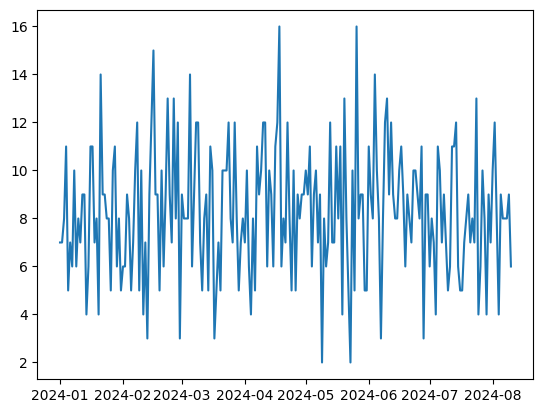

In [121]:
# Then we can plot the number of unique customers ordering on each day in a figure
plt.figure()
plt.plot(num_customer_per_day["date"], num_customer_per_day["num_customers"])


3. Which customers are the top purchasers? I.e., those who purchased the highest total number of products and came the highest total number of trips.

Plan:
- Need to count the number of trips and sum up the number of purchases by customer
- Careful with column headers! But this is pretty easy!

In [122]:
# Write your code here
customer_summary = order_data.groupby("customer_id", as_index=False).agg({
    "order_quantity": ["sum", "count"],
    "product": "nunique"
})
customer_summary.columns = ["customer_id", "total_quantity", "total_orders", "total_unique_products"]
customer_summary = customer_summary.sort_values("total_quantity", ascending=False).reset_index(drop=True)
customer_summary.head()

,customer_id,total_quantity,total_orders,total_unique_products
0,C070,214,92,4
1,C012,205,82,4
2,C002,192,75,4
3,C053,171,68,4
4,C051,169,69,4


4. What is the average duration between purchases for each customer (i.e., inter-purchase duration, or max recency). What is the distribution of this average duration?

Plan:
- Hmmm, first need to compute inter-purchase duration, then we'll compute the average inter-purchase duration.
- To compute inter-purchase duration, we'll need to take the difference between trip dates. We can use `shift(1)` to access the previous trip date. Then, careful not to do this "cross customers" -- i.e., to take the first date of one customer minus the last date of the previous customer. 
- Then, we can take average. But wait, we'll need to handle missing (first observation of every customer is missing because it comes from the first-differencing)!
- Once we can take average while handling missings, we can get the mean and distribution of this average inter-purchase duration. 

In [123]:
# STEP 1: we need a data frame on the customer_id - order_date level
customer_date = order_data.groupby(["customer_id", "order_date"], as_index=False).agg({"product": "nunique"}).drop(columns="product")
customer_date = customer_date.sort_values(["customer_id", "order_date"])
customer_date.head()

,customer_id,order_date
0,C001,2024-01-19
1,C001,2024-02-07
2,C001,2024-04-23
3,C001,2024-06-24
4,C002,2024-01-04


(array([29., 22.,  6.,  5.,  6.,  9.,  3.,  1.,  1.,  3.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  3.17647059,   9.12941176,  15.08235294,  21.03529412,
         26.98823529,  32.94117647,  38.89411765,  44.84705882,
         50.8       ,  56.75294118,  62.70588235,  68.65882353,
         74.61176471,  80.56470588,  86.51764706,  92.47058824,
         98.42352941, 104.37647059, 110.32941176, 116.28235294,
        122.23529412, 128.18823529, 134.14117647, 140.09411765,
        146.04705882, 152.        ]),
 <BarContainer object of 25 artists>)

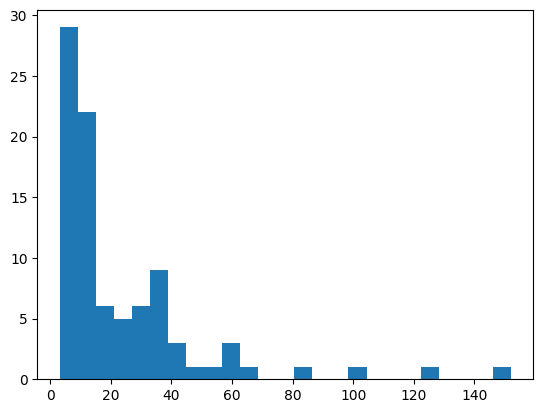

In [124]:
# STEP 2: 
# 
# (1) for each person, take first difference to get interpurchase duration
# (2) take the average duration for each person
# (3) plot the distribution of the average duration

# step (1) 
customer_date["lag_date"] = customer_date.groupby("customer_id")["order_date"].shift(1)
customer_date["interpurchase_duration"] = customer_date["order_date"] - customer_date["lag_date"]

# step (1.5) convert days to numeric format
customer_date["interpurchase_duration"] = customer_date["interpurchase_duration"].dt.days

# step (2) 
avg_duration_dat = customer_date.groupby("customer_id", as_index=False).agg({"interpurchase_duration": "mean"})

# step (3)
plt.figure()
plt.hist(avg_duration_dat["interpurchase_duration"], bins=25)

#### Summary
- Aggregation functions (`mean`, `sum`, `median`, `max`, `count`, ...) work similarly in Pandas series as they do in NumPy arrays -- they map a group of values into a single value
- However, with Pandas' keys and column-wise structure, we have access to two powerful tools
    - `.groupby` to perform an action by parts of the data, defined as a given value of a variable or a group of variables. 
    - `.agg` to aggregate by specifying which column to apply a function on and the corresponding aggregation function.
- Usually need some clean-up steps after the .groupby().agg() action.
- Theory is simple, but as we saw, applications can be tricky -- this part comes from examples, exercises, and experience

## 8. Melt and Pivot

Another important set of methods is to reshape the data. Sometimes, we have "wide" data with many columns and fewer rows (fewer key variables). Sometimes, we have "long" data with many rows (many keys) but few columns. 

For example, Amy can continue to merge student grade data to get to a dataset with one column per course. This is a "wide" data in the sense that the key is `name`, and there are many columns containing grades of different courses.


Recall: we have grades for the three courses in separate files. For each file, we read the data from file, use the course name (in the loop) to re-define column name, and then merge the data to background_dat. 

In [125]:
# Recall background_dat
background_dat.head()

,name,entry_year,test_score
0,Bob Johnson,2019,75
1,Diana Prince,2019,89
2,Hannah Montana,2019,91
3,Julia Roberts,2019,89
4,Lara Croft,2019,90


In [126]:
# Loop to generate a wide data. 
# For each file, (1) read it, (2) redefine column names, (3) merge
# initialize data - grades_dat is just a data frame with the name column
grades_dat_wide = background_dat[["name"]].copy()
# repeatedly read and merge
for course in ["gba436", "gba464", "mkt440"]:
    # read file
    tempdat = pd.read_csv(f"./data/students_{course}.csv")
    # redefine column
    tempdat.rename(columns={"exam_score": f"exam_score_{course}", "exam_year": f"exam_year_{course}"}, inplace=True)
    # merge
    grades_dat_wide = pd.merge(grades_dat_wide, tempdat, on="name", how="outer")


Check and find that the merged `grades_dat_wide` is a wide data. The key is `name`, and the columns contain the year of the exam and the grades separately for the three classes.

In [127]:
grades_dat_wide.head()

,name,exam_year_gba436,exam_score_gba436,exam_year_gba464,exam_score_gba464,exam_year_mkt440,exam_score_mkt440
0,Alice Smith,2021.0,88.0,2021.0,100.0,2021.0,94.0
1,Amber Heard,2023.0,94.0,2023.0,83.0,NaN,NaN
2,Bob Johnson,NaN,NaN,2023.0,88.0,NaN,NaN
3,Bruce Wayne,NaN,NaN,2021.0,100.0,2021.0,100.0
4,Charlie Brown,2022.0,96.0,NaN,NaN,2022.0,84.0


What if Amy would like to make data "long"? I.e., she would like to have a data frame with only three columns:
- name
- course
- exam_year
- exam_score

And then the key would be composite, defined by `name` and `course`.

What can she do to get this data?

One way is to construct this data from scratch using the three csv files. We can concatenate all data into one longer data. We'll need to specify the column `course` each time we read a different course's grade data. But that can be done.

In [128]:
# Loop to generate a long data. 
grades_dat_long = pd.DataFrame()    # initialize the data
for course in ["gba436", "gba464", "mkt440"]:
    # read file
    tempdat = pd.read_csv(f"./data/students_{course}.csv")
    # add a course name
    tempdat["course"] = course
    # pd.concat
    grades_dat_long = pd.concat((grades_dat_long, tempdat), axis=0)

# clean up index
grades_dat_long.reset_index(inplace=True, drop=True)

In [129]:
grades_dat_long.head()

,name,exam_year,exam_score,course
0,Alice Smith,2021,88,gba436
1,Charlie Brown,2022,96,gba436
2,Diana Prince,2023,88,gba436
3,Fiona Gallagher,2021,78,gba436
4,George Clooney,2022,82,gba436


#### What is the benefit of long and wide data, respectively?

Long data makes it easy to perform calculation on one column
- e.g., max and mean grade, how many distinct courses per student

Wide data makes it easy to perform calculations across columns
- e.g., grade improvement from gba436 to gba464

It is impossible to say which format is good. The two formats each has its own benefit.

#### Question: can we convert long data to wide, and wide data to long?
Constructing these data from the ground up is time-consuming and cumbersome to code. We would benefit from conversion between the two shapes.

For this, Amy would use `pd.melt` and `pd.pivot`.

### 8.1 `pd.melt` to convert data to long
`pd.melt` is a simple function that "melts" any data into long data. The basic syntax is 

`pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name=None)`

where 
- `frame` refers to the data
- `id_vars` are variables that we "hold fix" -- ususally keys of the previous data
- `value_vars` are variables we'll melt. `value_vars` can be skipped, in which case we'll melt all variables not in `id_vars`
- `var_name` and `value_name` refer to naming conventions. We don't have to set these. But they save our effort to reset column names later.


Before getting our hands on `grades_dat_wide`, let's look at a simple example.

In [130]:
# Example - gold medals by country and year
gold_data_wide = pd.DataFrame({
    'Country': ['USA', 'China', 'Japan'],
    '2024': [40, 40, 20],
    '2020': [39, 38, 27],
    '2016': [46, 26, 12],
    '2012': [48, 39, 7]
})
gold_data_wide

,Country,2024,2020,2016,2012
0,USA,40,39,46,48
1,China,40,38,26,39
2,Japan,20,27,12,7


We can melt this data into a long format, such that the keys are `Country` and `Year`, and we have one column `Gold`. 

Before we write the code, let's ask ourselves:
- Which columns do we want to "hold fix" (not melt)? -- that should be `Country`
- Which columns do we want to melt? -- that should be everything else!

In [131]:
gold_data_long = pd.melt(gold_data_wide, id_vars="Country", var_name="Year", value_name="Gold")
gold_data_long

,Country,Year,Gold
0,USA,2024,40
1,China,2024,40
2,Japan,2024,20
3,USA,2020,39
4,China,2020,38
5,Japan,2020,27
6,USA,2016,46
7,China,2016,26
8,Japan,2016,12
9,USA,2012,48


Now let's get back to Amy. Let's try to melt `grades_dat_wide` into long. Again we ask ourselves which columns should be in `id_vars` and which columns should we melt. We can e.g., try:

In [132]:
# melt grades_dat_wide into long format
test_melt = pd.melt(grades_dat_wide, id_vars="name")
test_melt.head()

,name,variable,value
0,Alice Smith,exam_year_gba436,2021.0
1,Amber Heard,exam_year_gba436,2023.0
2,Bob Johnson,exam_year_gba436,NaN
3,Bruce Wayne,exam_year_gba436,NaN
4,Charlie Brown,exam_year_gba436,2022.0


Okay, the data is indeed in long format. But we have some problems:
- `variable` contains both the exam year and the exam grade. Not good!
- `variable` is a long string "exam_year_gba464." We actually wanted a shorter string, just "gba464."
- column names `variable` and `value` are not super informative. Need to change that as well.
- missing data

What's the right solution?

In this case, Amy realizes that she actually needs two melts. Because some of the data are about exam years. And some about exam grades. We shouldn't confound these information in the first place. So Amy would need to find columns that contain the keyword "exam_year" and "exam_grade" and then handle these two groups of values separately. 

#### Digression: let's talk about string value matching

We need to match a string value, say "exam_year," among the columns. We can use the regular expression library `re`.

Loosely speaking, we can use `re.match(pattern, text)` to detect whether a pattern is in some text. For example, we can find that string "exam_year" is a part of "exam_year_gba464."

Therefore, we can leverage `if re.match("exam_year", x)` to write a loop that screen out only the `"exam_year"`'s. 

In [133]:
import re
re.match("exam_year", "exam_year_gba464")

<re.Match object; span=(0, 9), match='exam_year'>

In [134]:
# can write a list of all columns that contain the keyword "exam_year"
[x for x in grades_dat_wide.columns if re.match("exam_year", x)]

['exam_year_gba436', 'exam_year_gba464', 'exam_year_mkt440']

Further, we can use `.str.replace("old", "new")` to replace strings in a column. Similarly, `re.sub(pattern, replacement, text)` to substitute a string pattern with a replacement. But `re.sub` is beyond our class.

In [135]:
# if we have a column that contains "exam_year_", we can get rid of this string easily
test_series = pd.Series(["exam_year_gba464", "exam_year_gba436", "exam_year_mkt440"])
test_series.str.replace("exam_year_", "")

0    gba464
1    gba436
2    mkt440
dtype: object

Now, back to the melt problem, where we need to melt by the two groups, exam_year and exam_grade

In [136]:
# First, melt data only about exam_year
exam_year_cols = [x for x in grades_dat_wide.columns if re.match("exam_year", x)]
exam_year_melt = pd.melt(grades_dat_wide, id_vars="name", value_vars=exam_year_cols, var_name="course", value_name="exam_year")
exam_year_melt

,name,course,exam_year
0,Alice Smith,exam_year_gba436,2021.0
1,Amber Heard,exam_year_gba436,2023.0
2,Bob Johnson,exam_year_gba436,NaN
3,Bruce Wayne,exam_year_gba436,NaN
4,Charlie Brown,exam_year_gba436,2022.0
...,...,...,...
85,Vin Diesel,exam_year_mkt440,NaN
86,Will Smith,exam_year_mkt440,2021.0
87,Xander Cage,exam_year_mkt440,2022.0
88,Yvonne Strahovski,exam_year_mkt440,2021.0


Good! Now, not only do we have a long data, but we only have the exam_year columns. We still need a bit of clean-up, but this is a good step.

Further cleanups:
- `course` needs to contain "gba436," not "exam_year_gba436."
- missing values
- exam_year's data type (completely optional) 

In [137]:
# get rid of "exam_year_" in course
exam_year_melt.loc[:, "course"] = exam_year_melt.loc[:, "course"].str.replace("exam_year_", "")

# get rid of missing
exam_year_melt = exam_year_melt.loc[exam_year_melt["exam_year"].notna(), :]

# exam_year to integer
exam_year_melt["exam_year"] = exam_year_melt["exam_year"].astype(int)

# check results
exam_year_melt.head()

C:\Users\yfhua\AppData\Local\Temp\ipykernel_19628\4062107480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_year_melt["exam_year"] = exam_year_melt["exam_year"].astype(int)


,name,course,exam_year
0,Alice Smith,gba436,2021
1,Amber Heard,gba436,2023
4,Charlie Brown,gba436,2022
5,Clark Kent,gba436,2023
6,Daisy Ridley,gba436,2023


In [138]:
# Next, do the melt for exam_score

# find the exam_score columns
exam_score_cols = [x for x in grades_dat_wide.columns if re.match("exam_score", x)]
exam_score_melt = pd.melt(grades_dat_wide, id_vars="name", value_vars=exam_score_cols, var_name="course", value_name="exam_score")
exam_score_melt

# then clean up:
# get rid of "exam_year_" in course
exam_score_melt.loc[:, "course"] = exam_score_melt.loc[:, "course"].str.replace("exam_score_", "")

# get rid of missing
exam_score_melt = exam_score_melt[exam_score_melt["exam_score"].notna()]

# exam_year to integer
exam_score_melt["exam_score"] = exam_score_melt["exam_score"].astype(int)

# check results
exam_score_melt.head()

,name,course,exam_score
0,Alice Smith,gba436,88
1,Amber Heard,gba436,94
4,Charlie Brown,gba436,96
5,Clark Kent,gba436,90
6,Daisy Ridley,gba436,91


Finally, Amy can merge the two long data. The final data contains two key columns: `name` and `course`, and two value columns `exam_year` and `exam_score`.

In [139]:
# Try construct the final data
pd.merge(exam_year_melt, exam_score_melt, on=["name", "course"], how="inner")

,name,course,exam_year,exam_score
0,Alice Smith,gba436,2021,88
1,Amber Heard,gba436,2023,94
2,Charlie Brown,gba436,2022,96
3,Clark Kent,gba436,2023,90
4,Daisy Ridley,gba436,2023,91
5,Diana Prince,gba436,2023,88
6,Fiona Gallagher,gba436,2021,78
7,George Clooney,gba436,2022,82
8,Hannah Montana,gba436,2023,89
9,Lara Croft,gba436,2023,79


### 8.2. Pivot to turn data into specific structures

If `pd.melt` is to melt data as if we liquidify metal, `pd.pivot` is to reconstruct these liquidified material into specific shapes. 

`pd.pivot(data, columns, index, values)`

Where:
- `data` is the melted data we work with
- `columns` specifies which variables will live in the column
- `index` specifies which variables will live in the row
    - default gives an index
    - if want a variable need to do reset_idex
- `values` specifies which value column is relocated as the value of the new data 

For example, one way to construct data frames from melted (long) data is to construct them into wide

In [140]:
# Take the exam_score_melt data 
exam_score_melt.head()

,name,course,exam_score
0,Alice Smith,gba436,88
1,Amber Heard,gba436,94
4,Charlie Brown,gba436,96
5,Clark Kent,gba436,90
6,Daisy Ridley,gba436,91


Take the exam_score_melt data. One can construct the data such that names are in the row, courses are in the column.

In [141]:
pd.pivot(exam_score_melt, columns="course", index="name", values="exam_score").reset_index().head(12)

course,name,gba436,gba464,mkt440
0,Alice Smith,88.0,100.0,94.0
1,Amber Heard,94.0,83.0,NaN
2,Bob Johnson,NaN,88.0,NaN
3,Bruce Wayne,NaN,100.0,100.0
4,Charlie Brown,96.0,NaN,84.0
5,Clark Kent,90.0,87.0,70.0
6,Daisy Ridley,91.0,91.0,78.0
7,Diana Prince,88.0,90.0,NaN
8,Ethan Hunt,NaN,97.0,NaN
9,Fiona Gallagher,78.0,NaN,75.0


Similarly, we can pivot the exam_year_melt data:

In [142]:
pd.pivot(exam_year_melt, columns="course", index="name", values="exam_year").reset_index().head(12)

course,name,gba436,gba464,mkt440
0,Alice Smith,2021.0,2021.0,2021.0
1,Amber Heard,2023.0,2023.0,NaN
2,Bob Johnson,NaN,2023.0,NaN
3,Bruce Wayne,NaN,2021.0,2021.0
4,Charlie Brown,2022.0,NaN,2022.0
5,Clark Kent,2023.0,2023.0,2023.0
6,Daisy Ridley,2023.0,2023.0,2023.0
7,Diana Prince,2023.0,2023.0,NaN
8,Ethan Hunt,NaN,2021.0,NaN
9,Fiona Gallagher,2021.0,NaN,2021.0


But we can restructure the data differently! 
- Example 1: we can make course in the row and names in the column

In [143]:
# Write your code here
pd.pivot(exam_score_melt, columns="name", index="course", values="exam_score").reset_index().head(12)

name,course,Alice Smith,Amber Heard,Bob Johnson,Bruce Wayne,Charlie Brown,Clark Kent,Daisy Ridley,Diana Prince,Ethan Hunt,...,Quincy Adams,Rachel Green,Sam Winchester,Tina Fey,Uma Thurman,Vin Diesel,Will Smith,Xander Cage,Yvonne Strahovski,Zachary Levi
0,gba436,88.0,94.0,NaN,NaN,96.0,90.0,91.0,88.0,NaN,...,92.0,99.0,NaN,89.0,99.0,100.0,NaN,NaN,88.0,NaN
1,gba464,100.0,83.0,88.0,100.0,NaN,87.0,91.0,90.0,97.0,...,97.0,83.0,72.0,NaN,85.0,94.0,NaN,93.0,NaN,84.0
2,mkt440,94.0,NaN,NaN,100.0,84.0,70.0,78.0,NaN,NaN,...,NaN,100.0,76.0,NaN,NaN,NaN,70.0,70.0,95.0,100.0


- Example 2: we can do an aggregate step right when we do `pivot`. That's `pivot_table`.

In [144]:
# What is the average and standard deviation of score for each class?
pd.pivot_table(exam_score_melt, columns="course", values="exam_score", aggfunc=["mean", "std"]).reset_index().head(12)

index       mean                             std            \
course                 gba436     gba464     mkt440    gba436    gba464   
0       exam_score  90.526316  90.086957  85.529412  6.627958  8.628247   

                   
course     mkt440  
0       11.314358

In [145]:
# Or let course occupy the rows
pd.pivot_table(exam_score_melt, index="course", values="exam_score", aggfunc=["mean", "std"]).reset_index().head(12)

,course,mean,std
,,exam_score,exam_score
0,gba436,90.526316,6.627958
1,gba464,90.086957,8.628247
2,mkt440,85.529412,11.314358


### Exercise
Let's go over one big-ish exercise. We all feel the heat these days. Let's look at historical temperatures from the 1700s all the way to recent days and determine how much temperature has risen, and whether that's related to the amount of carbon emissions per year.

The data is pretty big. I'll make an efficiency point with these data as well.

In [11]:
# Read temperature data
temperature_data = pd.read_csv("./data/GlobalLandTemperaturesByCity.csv")
temperature_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
# Read carbon emission data
carbon_data = pd.read_excel("./data/National_Fossil_Carbon_Emissions_2022v1.0.xlsx", 
                            sheet_name="Territorial Emissions",
                            skiprows=11,        # the first 11 rows are manual, not data
                            engine="openpyxl")
carbon_data.head()

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
0,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069,...,0.004014,0.0,48.315986,0.0,5.418,0.0,0.0,0.0,0.000000e+00,53.738
1,1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.0,47.517000,0.0,6.742,0.0,0.0,0.0,0.000000e+00,54.259
2,1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.0,49.311000,0.0,7.335,0.0,0.0,0.0,-7.105427e-15,56.646
3,1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.0,51.022000,0.0,8.260,0.0,0.0,0.0,-7.105427e-15,59.282
4,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.0,60.550000,0.0,9.084,0.0,0.0,0.0,0.000000e+00,69.634


Now that we have the data, we're trying to answer a few questions:
1. How to fill missings? What is the right way to fill missing?
2. Examine temperature variations over year, month-of-the-year, and coordinates
3. How to average temperature to the country-year level, merge with that country's emissions, and examine their relationships?

##### 1. How to fill missings?
- Need to carefully examine the data and think about what one should do.
- One idea is to interpolate over missing temperature but fill zero for missing emissions. 


In [12]:
# Write your code here

# Carbon
carbon_data = carbon_data.fillna(0)     
# this is a little bit brute-force. You can also do it by column. But after careful inspection we decided this is fine.

# temperature
temperature_data["AverageTemperature"] = temperature_data["AverageTemperature"].interpolate()

##### 2. How do temperature vary with year, month-of-the-year, and coordinates?
- There are many ways to look at this. 
    - e.g., for a given location (e.g., "Rochester" in "United States"), pivot the data to "year by month" structure (year in the row, month in the column)
    - e.g., scatter plot a given year-month's temperature across cities by the city's latitude
    - e.g., heat map the temperature over latitude and longitude, or given latitude and longitude, over year and month

- Note that, one has to convert latitude and longitude to numeric values, changing the "W" and "S" to negative values
    - we have such a large dataset, so we have to be super efficient here, so we probably don't want to loop over rows
    - but, there's no universal function that readily trims strings! Oh no!

Approach 1: use `.str` accessor
- Remember we have `.dt.year`? The `.dt` is an accessor, which helps vectorize the specific action of extracting year from a pd.Series date
- We also have `.str` as a string accessor, which helps bring string functions to the entire series

In [5]:
# Example
a = "78.55W"
print(a[-1], a[:-1])

W 78.55


In [150]:
# Example con'd
b = pd.Series(["52.23W", "32.50E", "28.37E"])
b.str[-1]
# equivalent is b.str.slice(-1)

0    W
1    E
2    E
dtype: object

In [151]:
# Example con'd
b = pd.Series(["Apple", "OrANgE", "bAnAnA"])
b.str.lower()

0     apple
1    orange
2    banana
dtype: object

In [152]:
# # Code to change strings -- you CANNOT loop over rows
# temperature_data["Latitude_NS"] = temperature_data["Latitude"].str[-1]
# temperature_data["Longitude_EW"] = temperature_data["Longitude"].str[-1]
# temperature_data["Latitude"] = temperature_data["Latitude"].str[:-1].astype(float)
# temperature_data["Longitude"] = temperature_data["Longitude"].str[:-1].astype(float)
# temperature_data["Latitude"] = temperature_data["Latitude"] * (-1 * (temperature_data["Latitude_NS"] == "S") + 1 * (temperature_data["Latitude_NS"] == "N"))
# temperature_data["Longitude"] = temperature_data["Longitude"] * (-1 * (temperature_data["Longitude_EW"] == "W") + 1 * (temperature_data["Latitude_NS"] == "E"))

In [6]:
# Better: loop to avoid copy-paste
for var in ["Latitude", "Longitude"]:
    temperature_data["temp"] = temperature_data[var].str[-1]
    temperature_data[var] = temperature_data[var].str[:-1].astype(float)
    temperature_data[var] = temperature_data[var] * (-1 * temperature_data["temp"].isin({"S", "W"}) + temperature_data["temp"].isin({"N", "E"}))
    temperature_data.drop(columns="temp", inplace=True)


Approach 2: use the `.apply` method
- `.apply()` accepts a function as the argument 
- it works on any function (that itself does not vectorize), not just the ones enabled by the accessors

In [13]:
# Alternative: what if I don't know the .str accessor?
def change_lat_lon(x):
    res = float(x[:-1])
    if x[-1] in {"S", "W"}:
        res = -res
    return res

for var in ["Latitude", "Longitude"]:
    temperature_data[var] = temperature_data[var].apply(change_lat_lon)

In [19]:
# Check results
temperature_data[temperature_data["City"] == "Rochester"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
6390515,1743-11-01,1.6880,1.834,Rochester,United States,42.59,-78.55,1743,11
6390516,1743-12-01,2.8904,NaN,Rochester,United States,42.59,-78.55,1743,12
6390517,1744-01-01,4.0928,NaN,Rochester,United States,42.59,-78.55,1744,1
6390518,1744-02-01,5.2952,NaN,Rochester,United States,42.59,-78.55,1744,2
6390519,1744-03-01,6.4976,NaN,Rochester,United States,42.59,-78.55,1744,3
...,...,...,...,...,...,...,...,...,...
6393749,2013-05-01,15.1890,0.153,Rochester,United States,42.59,-78.55,2013,5
6393750,2013-06-01,18.7160,0.099,Rochester,United States,42.59,-78.55,2013,6
6393751,2013-07-01,22.1650,0.322,Rochester,United States,42.59,-78.55,2013,7
6393752,2013-08-01,19.7790,0.344,Rochester,United States,42.59,-78.55,2013,8


Now, let's continue with the question

In [16]:
# Code to pivot Rochester's temperature by year and month

# first need year and month
temperature_data["dt"] = pd.to_datetime(temperature_data["dt"], format="%Y-%m-%d")
temperature_data["year"] = temperature_data["dt"].dt.year
temperature_data["month"] = temperature_data["dt"].dt.month



In [22]:
# then pivot
roc_temp_dat = temperature_data[temperature_data["City"] == "Rochester"].pivot(index="year", columns="month", values="AverageTemperature")
roc_temp_dat

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.688000,2.890400
1744,4.092800,5.295200,6.497600,7.700000,13.613000,19.437000,20.682000,17.172000,13.662000,7.449000,1.728000,-4.157000
1745,-4.633000,-5.002000,-1.272000,5.949000,5.739842,5.530684,5.321526,5.112368,4.903211,4.694053,4.484895,4.275737
1746,4.066579,3.857421,3.648263,3.439105,3.229947,3.020789,2.811632,2.602474,2.393316,2.184158,1.975000,1.765842
1747,1.556684,1.347526,1.138368,0.929211,0.720053,0.510895,0.301737,0.092579,-0.116579,-0.325737,-0.534895,-0.744053
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-8.090000,-2.677000,1.766000,7.978000,13.828000,17.637000,19.167000,20.963000,16.369000,8.617000,6.205000,-2.485000
2010,-4.753000,-3.945000,3.746000,10.118000,15.294000,19.693000,22.846000,21.748000,16.638000,10.131000,4.215000,-4.297000
2011,-6.208000,-4.168000,0.206000,7.450000,14.700000,19.369000,23.471000,21.129000,17.943000,10.202000,7.228000,1.057000


In [34]:
# Code to look at temperature changes over year-month, over month of the year, and over latitude

In [ ]:
# Code to plot a heat map over latitude and longitude for different years
# one way is to create a heat map for a given year, averaging over cities around the same lat and lon
# 1. discretize lat grid and lon grid to unit of 5
# 2. do groupby.agg
# 3. convert the lat-lon grid into lat in the row and lon in the column
# 4. plot


In [53]:
# 1. discretize lat and lon, and groupby.agg
temperature_data["lat_discrete"] = np.round(temperature_data["Latitude"]/5)*5
temperature_data["lon_discrete"] = np.round(temperature_data["Longitude"]/10)*10


In [ ]:
# 2. groupby.agg to average temperature by latitude and longitude, for now look at year 2010
temperature_data_agg = temperature_data[temperature_data["year"] == 2010].groupby(["lat_discrete", "lon_discrete"], as_index=False).agg({"AverageTemperature": "mean"})

In [54]:
# 3. pivot into latitude in the row and longitude in the column
temperature_data_agg = temperature_data_agg.pivot(index="lat_discrete", columns="lon_discrete", values="AverageTemperature")

Text(0.5, 1.0, 'Heat Map of Temperature by Latitude and Longitude')

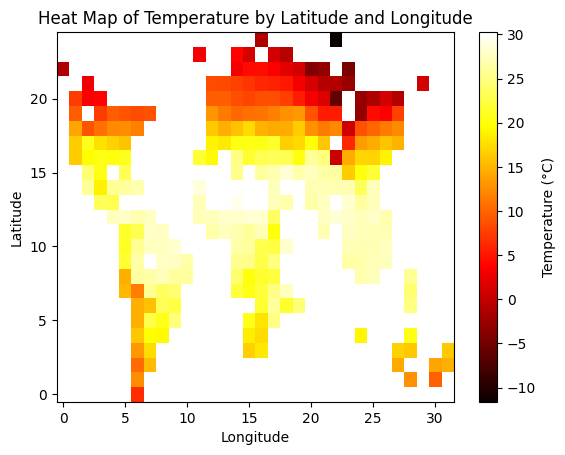

In [57]:
# 4. plot heat map
plt.figure()
plt.imshow(temperature_data_agg, cmap='hot', origin='lower', aspect='auto')

# add parameters
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heat Map of Temperature by Latitude and Longitude')

##### 3. Emissions and temperature
We're now curious whether emissions or the accumulation of past emissions explain the country's temperature. So: 
- Let's aggregate countries' emissions to the country-year level and merge with emissions at this level. 
- Then, calculate the correlation between the country's temperature and emissions
- We can look at cumulative emissions (using `cumsum`) and see whether that explains temperature
- We can also look at the worldwide time series of temperature and cumulative total emissions (the column `World`)


In [ ]:
# Write your code here

## 9. Efficiency considerations

I said we'll need to talk about this point. We're running a bit out of time, so I'll be very brief.

- Time is life. Computer takes one hour to run, we'll waste that time on YouTube and Instagram. Computer takes 10 minutes to run, we can get to the next stage of our workflow faster. Computer takes 30 seconds to run, then we'll work uninterrupted (and get off work sooner!). So how fast your code works can generally affect your lifetime productivity.

- Vectorize. Relentlessly vectorize. (And how to? -- universal functions, accesors, .apply)
    - we've talked about universal functions
    - .apply to run non-universal functions "as if" they are vectorized

- Efficient libraries
    - Polars
    - GPU, CuPy, and cuDF
    - PyTorch (both CPU and GPU)

Side comment: code efficiency is my favorite topic, and with Python, so much more exicting stuff to talk about!


In [ ]:
# For this section, we'll be using the time library as a timer
import time

### 9.1 Relentlessly vectorize

We've talked about universal functions and why we should vectorize. Let's revisit this and look at some other ways we can vectorize.

#### Universal functions

Functions that vectorize (and broadcast and typecast). Vectorizing is usually much much faster, so we should vectorize when we use universal functions.

To illustrate, let's try to simulate many random walks. An asset's price follows a random walk if the price yesterday is the price today plus an idiosyncratic disturbance. I.e., 

`p_t = p_t-1 + e_t`

where `p_t` is the price in t, and `e_t` is a normally distributed "random step."

We are a team of financial analysts who would like to simulate this random walk sequence, and then simulate many realizations of such sequences. We'll do this in a double loop and then think about how to do this better. 

In [ ]:
# Let's first consider one random walk
np.random.rand(1024)
num_steps = 1_000       # 1_000 days
price_sequence = np.zeros(num_steps)
price_sequence[0] = 10  # initial price

for t in range(1, num_steps):
    random_step = np.random.normal(0, 0.1)
    price_sequence[t] = price_sequence[t-1] + random_step

price_sequence[0:5]

array([10.        ,  9.97781526,  9.96622968, 10.07203121, 10.18468805])

Now plot the sequence. It is a nonstationary process -- it's a random walk afterall.

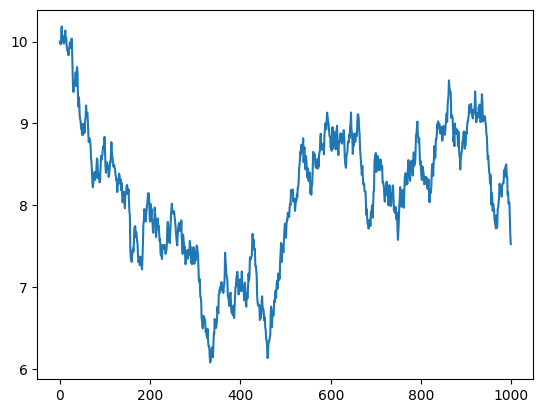

In [ ]:
plt.figure()
plt.plot(price_sequence)

Now, let's write a loop that simulates 100_000 of them. Why are we doing this? We're trying to assess the distribution of stock prices after T periods. 

In [ ]:
np.random.rand(1024)
num_sequences = 10_000     # 100_000 sequences (typed 10k to prevent accident runs)
num_steps = 1_000           # 1_000 days
initial_price = 10          # initial price is $10

# Simulate the random walk using a for-loop with NumPy arrays
start_time = time.time()

price_sequences = np.zeros((num_sequences, num_steps))  # make the result an np.array

for s in range(num_sequences):
    # for each sequence s, simulate the sequence
    price_sequences[s, 0] = initial_price

    for t in range(1, num_steps):
        random_step = np.random.normal(0, 0.1)          # this is one random step, or e_t
        price_sequences[s, t] = price_sequences[s, t-1] + random_step

end_time = time.time()
time_loop = end_time - start_time
print(f"Time taken using for loop: {time_loop}")


In [ ]:
# Check shape of set_of_price_sequences, find that it is 100_000 by 1_000
price_sequences.shape

(50000, 1000)

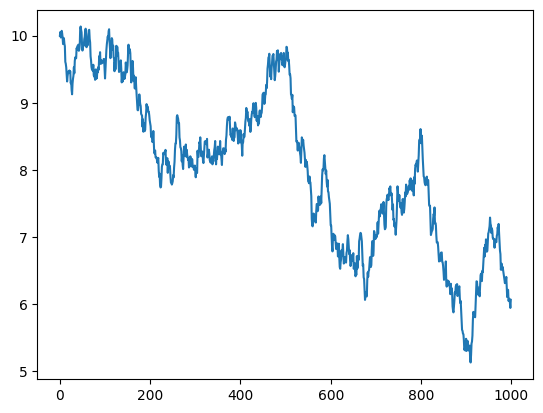

In [ ]:
# Plot individual paths
plt.figure()
plt.plot(price_sequences[1, :])

(array([1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 9.000e+00, 7.000e+00, 1.600e+01, 1.500e+01,
        2.200e+01, 2.400e+01, 5.100e+01, 5.400e+01, 5.200e+01, 7.500e+01,
        1.150e+02, 1.260e+02, 1.560e+02, 1.990e+02, 2.240e+02, 2.700e+02,
        3.450e+02, 3.780e+02, 4.630e+02, 5.160e+02, 5.680e+02, 6.620e+02,
        7.790e+02, 8.520e+02, 9.380e+02, 1.044e+03, 1.098e+03, 1.291e+03,
        1.377e+03, 1.375e+03, 1.498e+03, 1.592e+03, 1.628e+03, 1.759e+03,
        1.761e+03, 1.811e+03, 1.787e+03, 1.803e+03, 1.813e+03, 1.681e+03,
        1.702e+03, 1.640e+03, 1.597e+03, 1.529e+03, 1.444e+03, 1.367e+03,
        1.292e+03, 1.193e+03, 1.043e+03, 9.640e+02, 8.030e+02, 7.820e+02,
        7.170e+02, 6.070e+02, 4.740e+02, 4.680e+02, 3.820e+02, 3.280e+02,
        2.510e+02, 1.980e+02, 2.000e+02, 1.590e+02, 1.220e+02, 1.060e+02,
        9.700e+01, 6.500e+01, 4.800e+01, 4.200e+01, 2.800e+01, 2.000e+01,
        2.500e+01, 1.700e+01, 1.300e+0

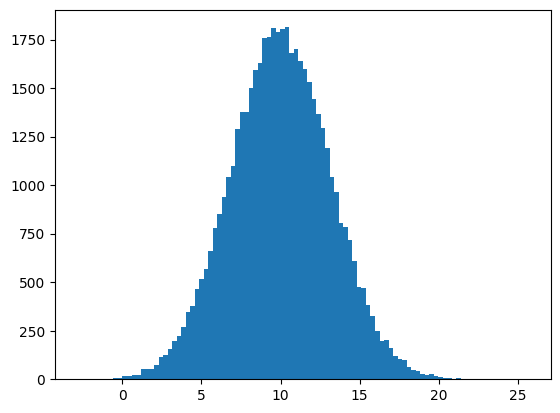

In [ ]:
plt.figure()
plt.hist(price_sequences[:, -1], bins=100)

Now, let's think about what is the right way to vectorize. 

You might ask: why can we vectorize? Weren't we asked to simulate different paths of random walks, defined by the following recursive formula?

`p_t = p_t-1 + e_t`

Well, if we look at the formula, we basically have:
- t = 0: `p_0 = 10`
- t = 1: `p_1 = p_0 + e_1`
- t = 2: `p_2 = p_1 + e_2 = p_0 + e_1 + e_2`
- t = 3: `p_3 = p_2 + e_3 = p_0 + e_1 + e_2 + e_3`
- ...
- t = n: `p_n = p_n-1 + e_n = p_0 + e_1 + ... + e_n`

In other words, the price is just the cumulative sum over the random steps!

And we have function `cumsum` to calculate the cumulative sum.


In [ ]:
# Simulate the random walk using NumPy
start_time = time.time()

# Generate random steps for all sequences at once
#   the first dimension is the different sequences, the second dimension is each sequence
random_steps = np.random.normal(0, 1, (num_sequences, num_steps-1))     

# Initialize the paths array with the initial price
paths_vectorized = np.zeros((num_sequences, num_steps))
paths_vectorized[:, 0] = initial_price

# Cumulative sum to simulate the random walk
paths_vectorized[:, 1:] = np.cumsum(random_steps, axis=1) + initial_price

# end timer
end_time = time.time()
time_np = end_time - start_time
print(f"Time taken using vectorized NumPy: {time_np}")


Time taken using NumPy: 1.4292397499084473


So, what took the for loop two minutes now takes two seconds!

But you say - sure, I vectorize everything I can, including this one. But sometimes what I need to run requires a function that cannot be vectorized. What to do now?

We have `.apply` in general! (And accessors as special cases)

In [ ]:
# .apply method
a = "2017-01"
date_str = pd.Series(["2017-01", "2018-02", "2019-03"])

# extract year
# pd.to_datetime(date_str, format="%Y-%m").dt.year

# apply way
def extract_year(x):
    return int(x[0:4])

date_str.apply(extract_year)

0    2017
1    2018
2    2019
dtype: int64

What else is available?

Modern ML libraries have switched over to PyTorch or Tensorflow

PyTorch is its own programming API that includes
- fundamentally rewritten data structures (`tensor`) and operations
- own optimizers and symbolic math, in support for NN architectures
- interface with GPUs

In [ ]:
num_sequences

500000

In [ ]:
import torch

# Parameters and timer
torch.manual_seed(0)
start_time = time.time()

# Generate random steps for all sequences at once
random_steps = torch.normal(0, 0.1, (num_sequences, num_steps-1))

# Initialize the paths tensor with the initial price
paths_torch = torch.zeros((num_sequences, num_steps))
paths_torch[:, 0] = 10

# Cumulative sum to simulate the random walk
paths_torch[:, 1:] = torch.cumsum(random_steps, dim=1) + 10

end_time = time.time()
print("Time taken using PyTorch:", end_time - start_time)


Time taken using PyTorch: 4.816939353942871


What else to do? Are we at our limit? 

How about hardware? Buying a faster CPU?

How about bringing out the GPU?
- What is a GPU? Why do we need it other than playing games?
- How fast can it be?

What is a GPU?

- graphical processing unit (as opposed to "central processing unit")
- CPUs often have 4-32 cores
    - operate with higher throughput
    - but few cores --> operations are sequential
- GPUs have thousands of cores
    - RTX3070 - 5,888 CUDA cores
    - Quadro GV100 - 5,120 CUDA cores and 640 Tensor cores
    - CUDA ("Compute Unified Device Architecture") is a parallel computing platform and API that allow computer languages to interface with Nvidia GPUs

Many GPU-dedicated libraries harness GPU's power in parallelization

<img src="../input/gpu-devotes-more-transistors-to-data-processing.png" width="800"/>

CuPy is the "CUDA version of NumPy"

In [ ]:
import cupy as cp

# Parameters
cp.random.seed(0)

# Simulate the random walk using CuPy
start_time = time.time()

# Generate random steps for all sequences at once
random_steps = cp.random.normal(0, 1, (num_sequences, num_steps-1))

# Initialize the paths array with the initial price
paths_cupy = cp.zeros((num_sequences, num_steps))
paths_cupy[:, 0] = 10

# Cumulative sum to simulate the random walk
paths_cupy[:, 1:] = cp.cumsum(random_steps, axis=1) + 10

end_time = time.time()

print("Time taken using CuPy:", end_time - start_time)


PyTorch natively supports GPUs. Simply set a GPU device, and the same Torch code now works on the GPU

In [ ]:
# GPU - my first device
my_device = torch.device('cuda:0')

# Parameters
torch.manual_seed(0)

# Simulate the random walk using PyTorch
start_time = time.time()

# Generate random steps for all sequences at once
random_steps = torch.normal(0, 1, [num_sequences, num_steps-1], device=my_device)

# Initialize the paths tensor with the initial price
paths_torch = torch.zeros([num_sequences, num_steps], device=my_device)
paths_torch[:, 0] = 10

# Cumulative sum to simulate the random walk
paths_torch[:, 1:] = torch.cumsum(random_steps, dim=1) + 10

end_time = time.time()

print("Time taken using PyTorch:", end_time - start_time)


Time taken using PyTorch: 0.0010156631469726562


#### Other fast libraries (quick overview)
We've been learning the "standard" Python, but in industrial practices, "standard" Python -- NumPy, Pandas, Matplotlib -- is not the right thing to use because of their suboptimal efficiency

Here I introduce new libraries that are much faster and with largely similar syntaxes

##### 1. Polars
Polars are faster and more fierce than Pandas, that's the idea

More seriously, Polars is a data frame library that is internally much more efficient than Pandas. It has a somewhat different syntax but operates on the same logic

Syntax:
- `import polars as pl`
- `df.select(["column1", "column2"])`
- `df.filter(pl.col("column_1") > 1)`
- `df.with_columns([pl.col("column_1") * 2).alias("column_3")])`
- `df.groupby("column_2").agg([pl.sum("column_3").alias("column_4")])`

so basically, `.select` to choose column, `.filter` to choose row, `with_columns()` to modify or create columns, and `[pl.fun().alias()]` (where "fun" is a function name) to apply function on columns


Let's contrast Pandas and Polars

In [ ]:
# a function that we will use
def change_lat_lon(x):
    res = float(x[:-1])
    if x[-1] in {"S", "W"}:
        res = -res
    return res

In [ ]:
import pandas as pd
import time

start_time = time.time()

# read data
temperature_data = pd.read_csv("./data/GlobalLandTemperaturesByCity.csv")

# fill zeros
temperature_data = temperature_data.fillna(0)

# convert date
temperature_data["Date"] = pd.to_datetime(temperature_data["dt"], format = "%Y-%m-%d")

# generate year
temperature_data["Year"] = temperature_data["Date"].dt.year

# change latitude/longitude to numeric
for var in ["Latitude", "Longitude"]:
    temperature_data[var] = temperature_data[var].apply(change_lat_lon)

# groupby average temperature, lat, and lon to country-year level
country_year_avg_temp = temperature_data.groupby(["Country", "Year"]).agg({
    "AverageTemperature": "mean", 
    "Latitude": "mean", 
    "Longitude": "mean"
})

# End timer
end_time = time.time()
print(f"Pandas time is {end_time - start_time}")


Now the Polars version:

In [ ]:
import polars as pl
import time

start_time = time.time()

# Read data
temperature_data = pl.read_csv("./data/GlobalLandTemperaturesByCity.csv")

# Fill zeros
temperature_data = temperature_data.fill_null(0)

# Convert date (no to_datetime, but can use the generic string function strptime)
temperature_data = temperature_data.with_columns(pl.col("dt").str.strptime(pl.Date, "%Y-%m-%d").alias("Date"))

# Generate year
temperature_data = temperature_data.with_columns(pl.col("Date").dt.year().alias("Year"))

# Change latitude and longitude into numeric (apply becomes "map_elements")
temperature_data = temperature_data.with_columns(
    pl.col(["Latitude", "Longitude"]).map_elements(change_lat_lon, return_dtype=float)
)

# Group by country and year, and calculate the mean of temperature, latitude, and longitude
country_year_avg_temp = temperature_data.group_by(["Country", "Year"]).agg([
    pl.col("AverageTemperature").mean().alias("AverageTemperature"),
    pl.col("Latitude").mean().alias("Latitude"),
    pl.col("Longitude").mean().alias("Longitude")
])

# End timer
end_time = time.time()
print(f"Polars time is {end_time - start_time}")


Now bring in the GPU power! Let's test out Torch Arrow and CuDF

In [ ]:
import cudf
import time

start_time = time.time()

# Read data
temperature_data = cudf.read_csv("./data/GlobalLandTemperaturesByCity.csv")

# Fill missing values with zeros
temperature_data = temperature_data.fillna(0)

# Convert date
temperature_data["Date"] = cudf.to_datetime(temperature_data["dt"], format="%Y-%m-%d")

# Generate year
temperature_data["Year"] = temperature_data["Date"].dt.year

# Apply custom function to latitude and longitude
temperature_data["Latitude"] = temperature_data["Latitude"].applymap(change_lat_lon)
temperature_data["Longitude"] = temperature_data["Longitude"].applymap(change_lat_lon)

# Group by country and year, and calculate the mean of temperature, latitude, and longitude
country_year_avg_temp = temperature_data.groupby(["Country", "Year"]).agg({
    "AverageTemperature": "mean",
    "Latitude": "mean",
    "Longitude": "mean"
})

# End timer
end_time = time.time()
print(f"cuDF time is {end_time - start_time}")


Torch Arrow version (translated by ChatGPT)

In [ ]:
import torcharrow as ta
import torcharrow.dtypes as dt
import time
import torch

start_time = time.time()

# Read data
temperature_data = ta.dataframe.from_csv("./data/GlobalLandTemperaturesByCity.csv")

# Fill missing values with zeros
temperature_data = temperature_data.fillna(0)

# Generate year (no to_datetime, need to cut strings)
temperature_data = temperature_data.with_column("Year", temperature_data["dt"].str.slice(0, 4).to(torch.int32))

# Apply custom function to latitude and longitude using .map
temperature_data = temperature_data.with_column("Latitude", temperature_data["Latitude"].map(change_lat_lon, dtype=dt.float32))
temperature_data = temperature_data.with_column("Longitude", temperature_data["Longitude"].map(change_lat_lon, dtype=dt.float32))

# Group by country and year, and calculate the mean of temperature, latitude, and longitude
# TorchArrow does not support direct groupby-aggregation like Pandas or cuDF; instead, this operation may need to be done using PyTorch operations after converting to tensors.
grouped = temperature_data.groupby(["Country", "Year"])
country_year_avg_temp = grouped.agg({
    "AverageTemperature": ("AverageTemperature", "mean"),
    "Latitude": ("Latitude", "mean"),
    "Longitude": ("Longitude", "mean"),
})

# End timer
end_time = time.time()
print(f"TorchArrow time is {end_time - start_time}")
